In [5]:
from volleyball_cv_alg import *
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
model_my = model.load_model('volleyball_cv_alg/model/yolov3.cfg', 'volleyball_cv_alg/model/yolov3_ckpt_600.pth')

/mnt/c/Users/nickk/volleyball_player_detection_app/volleyball_cv_alg/model.py:329: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(weights_pat

In [4]:
def draw_boxes(img, boxes):
    # Make a copy of the image to draw on
    img_copy = img.copy()

    for box in boxes:
        x1, y1, x2, y2, conf, cls = box
        
        # Convert coordinates to integers
        x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])
        
        # Draw rectangle
        color = (0, 255, 0)  # Green color for bounding box
        cv2.rectangle(img_copy, (x1, y1), (x2, y2), color, 2)
        
        # Prepare label text with confidence score
        label = f"player: {conf:.2f}"
        
        # Choose font and text size
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.5
        font_thickness = 1
        
        # Calculate text size to create a background for readability
        text_size = cv2.getTextSize(label, font, font_scale, font_thickness)[0]
        text_x, text_y = x1, y1 - 5  # Position above the box
        
        # Draw background rectangle for text
        cv2.rectangle(
            img_copy, 
            (text_x, text_y - text_size[1] - 2), 
            (text_x + text_size[0], text_y + 2), 
            color, 
            -1
        )
        
        # Draw label text on the image
        cv2.putText(
            img_copy, 
            label, 
            (text_x, text_y), 
            font, 
            font_scale, 
            (255, 255, 255),  # White color for text
            font_thickness
        )
    
    return img_copy

In [6]:
def display_image(img_with_boxes):
    plt.figure(figsize=(10, 10))
    plt.imshow(img_with_boxes)
    plt.axis('off')
    plt.show()

In [15]:
img = cv2.imread('test/volley-53-_png.rf.aa82a1acc693c9a4aa08510d615eb224.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [16]:
boxes = detect.detect_image(model_my, img, conf_thres=0.01, nms_thres=0.1)
boxes

array([[3.8034885e+02, 3.4479224e+02, 4.1099261e+02, 4.5463318e+02,
        4.6006292e-01, 0.0000000e+00],
       [1.7951001e+02, 3.0150262e+02, 2.0099521e+02, 4.0246249e+02,
        4.5700106e-01, 0.0000000e+00],
       [5.7427313e+02, 3.8288144e+02, 6.0192188e+02, 5.1044009e+02,
        4.4833553e-01, 0.0000000e+00],
       [2.1488762e+02, 3.3369165e+02, 2.3590639e+02, 4.2327460e+02,
        4.3024856e-01, 0.0000000e+00],
       [2.5400160e+02, 2.8037405e+02, 2.7843518e+02, 3.4737250e+02,
        4.2029649e-01, 0.0000000e+00],
       [3.2782199e+02, 2.8153940e+02, 3.5747382e+02, 3.3694067e+02,
        4.0553659e-01, 0.0000000e+00],
       [4.4080350e+02, 3.0555444e+02, 4.6236392e+02, 4.2446881e+02,
        3.7829626e-01, 0.0000000e+00],
       [5.9376898e+02, 3.5215735e+02, 6.1634863e+02, 4.4331909e+02,
        3.5837525e-01, 0.0000000e+00],
       [6.1461725e+02, 3.4222440e+02, 6.3721002e+02, 4.1055750e+02,
        2.4061412e-01, 0.0000000e+00],
       [2.4128989e+02, 3.1661066e+02,

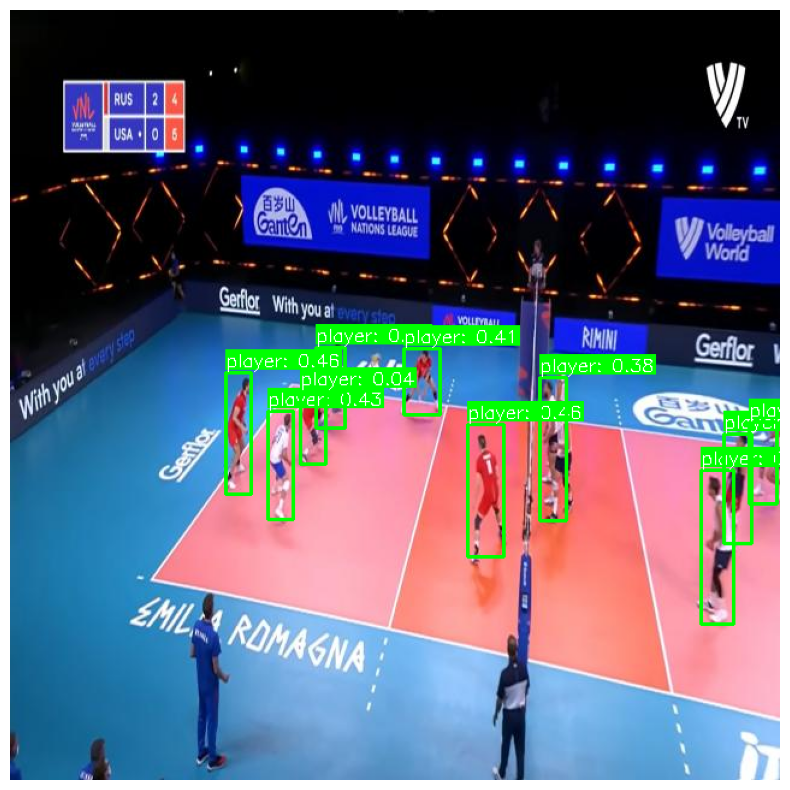

In [ ]:
img_with_boxes = draw_boxes(img, boxes)
display_image(img_with_boxes)
